In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib_inline
from pathlib import Path
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
import numpy as np
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 1
%aimport src.models.calc_eui

In [3]:
DATA_PATH = Path("../../data")

In [4]:
df = pd.read_csv(DATA_PATH.joinpath("processed", "KNN_data.csv"))

In [5]:
# reorder columns
cols = ['E (kWh)', 'G(therms)', 'O(gallon)', 'Building Gross Footage',
        'Building Code', 'distance_from_GSU (mi)', 'year_built', 'Stories', 'Height']
df = df[cols]

In [6]:
df.head()

,E (kWh),G(therms),O(gallon),Building Gross Footage,Building Code,distance_from_GSU (mi),year_built,Stories,Height
0,13205241.58,1658548.0,253894.7,384941.16,500,0.8,2000.0,19,195.0
1,15476.00,852.0,2571.7,4961.74,506,0.6,1910.0,5,44.0
2,83808.00,9248.0,0.0,4951.86,535,0.6,1910.0,5,44.0
3,21382.00,7269.0,0.0,8621.75,508,0.4,1901.0,5,40.0
4,1201216.00,4408.0,99773.0,203525.46,509,0.8,1926.0,10,80.0


In [7]:
eui = src.models.calc_eui.eui(df['E (kWh)'], df['G(therms)'],
                              df['O(gallon)'], df['Building Gross Footage'])
df['eui'] = eui.copy()
df.drop(['E (kWh)', 'G(therms)', 'O(gallon)', 'Building Gross Footage'], axis=1, inplace=True)

In [8]:
cols = ['eui', 'Building Code', 'distance_from_GSU (mi)', 'year_built', 'Stories',
       'Height']
df = df[cols]

Text(0.5, 1.0, 'Correlation of Features with EUI')

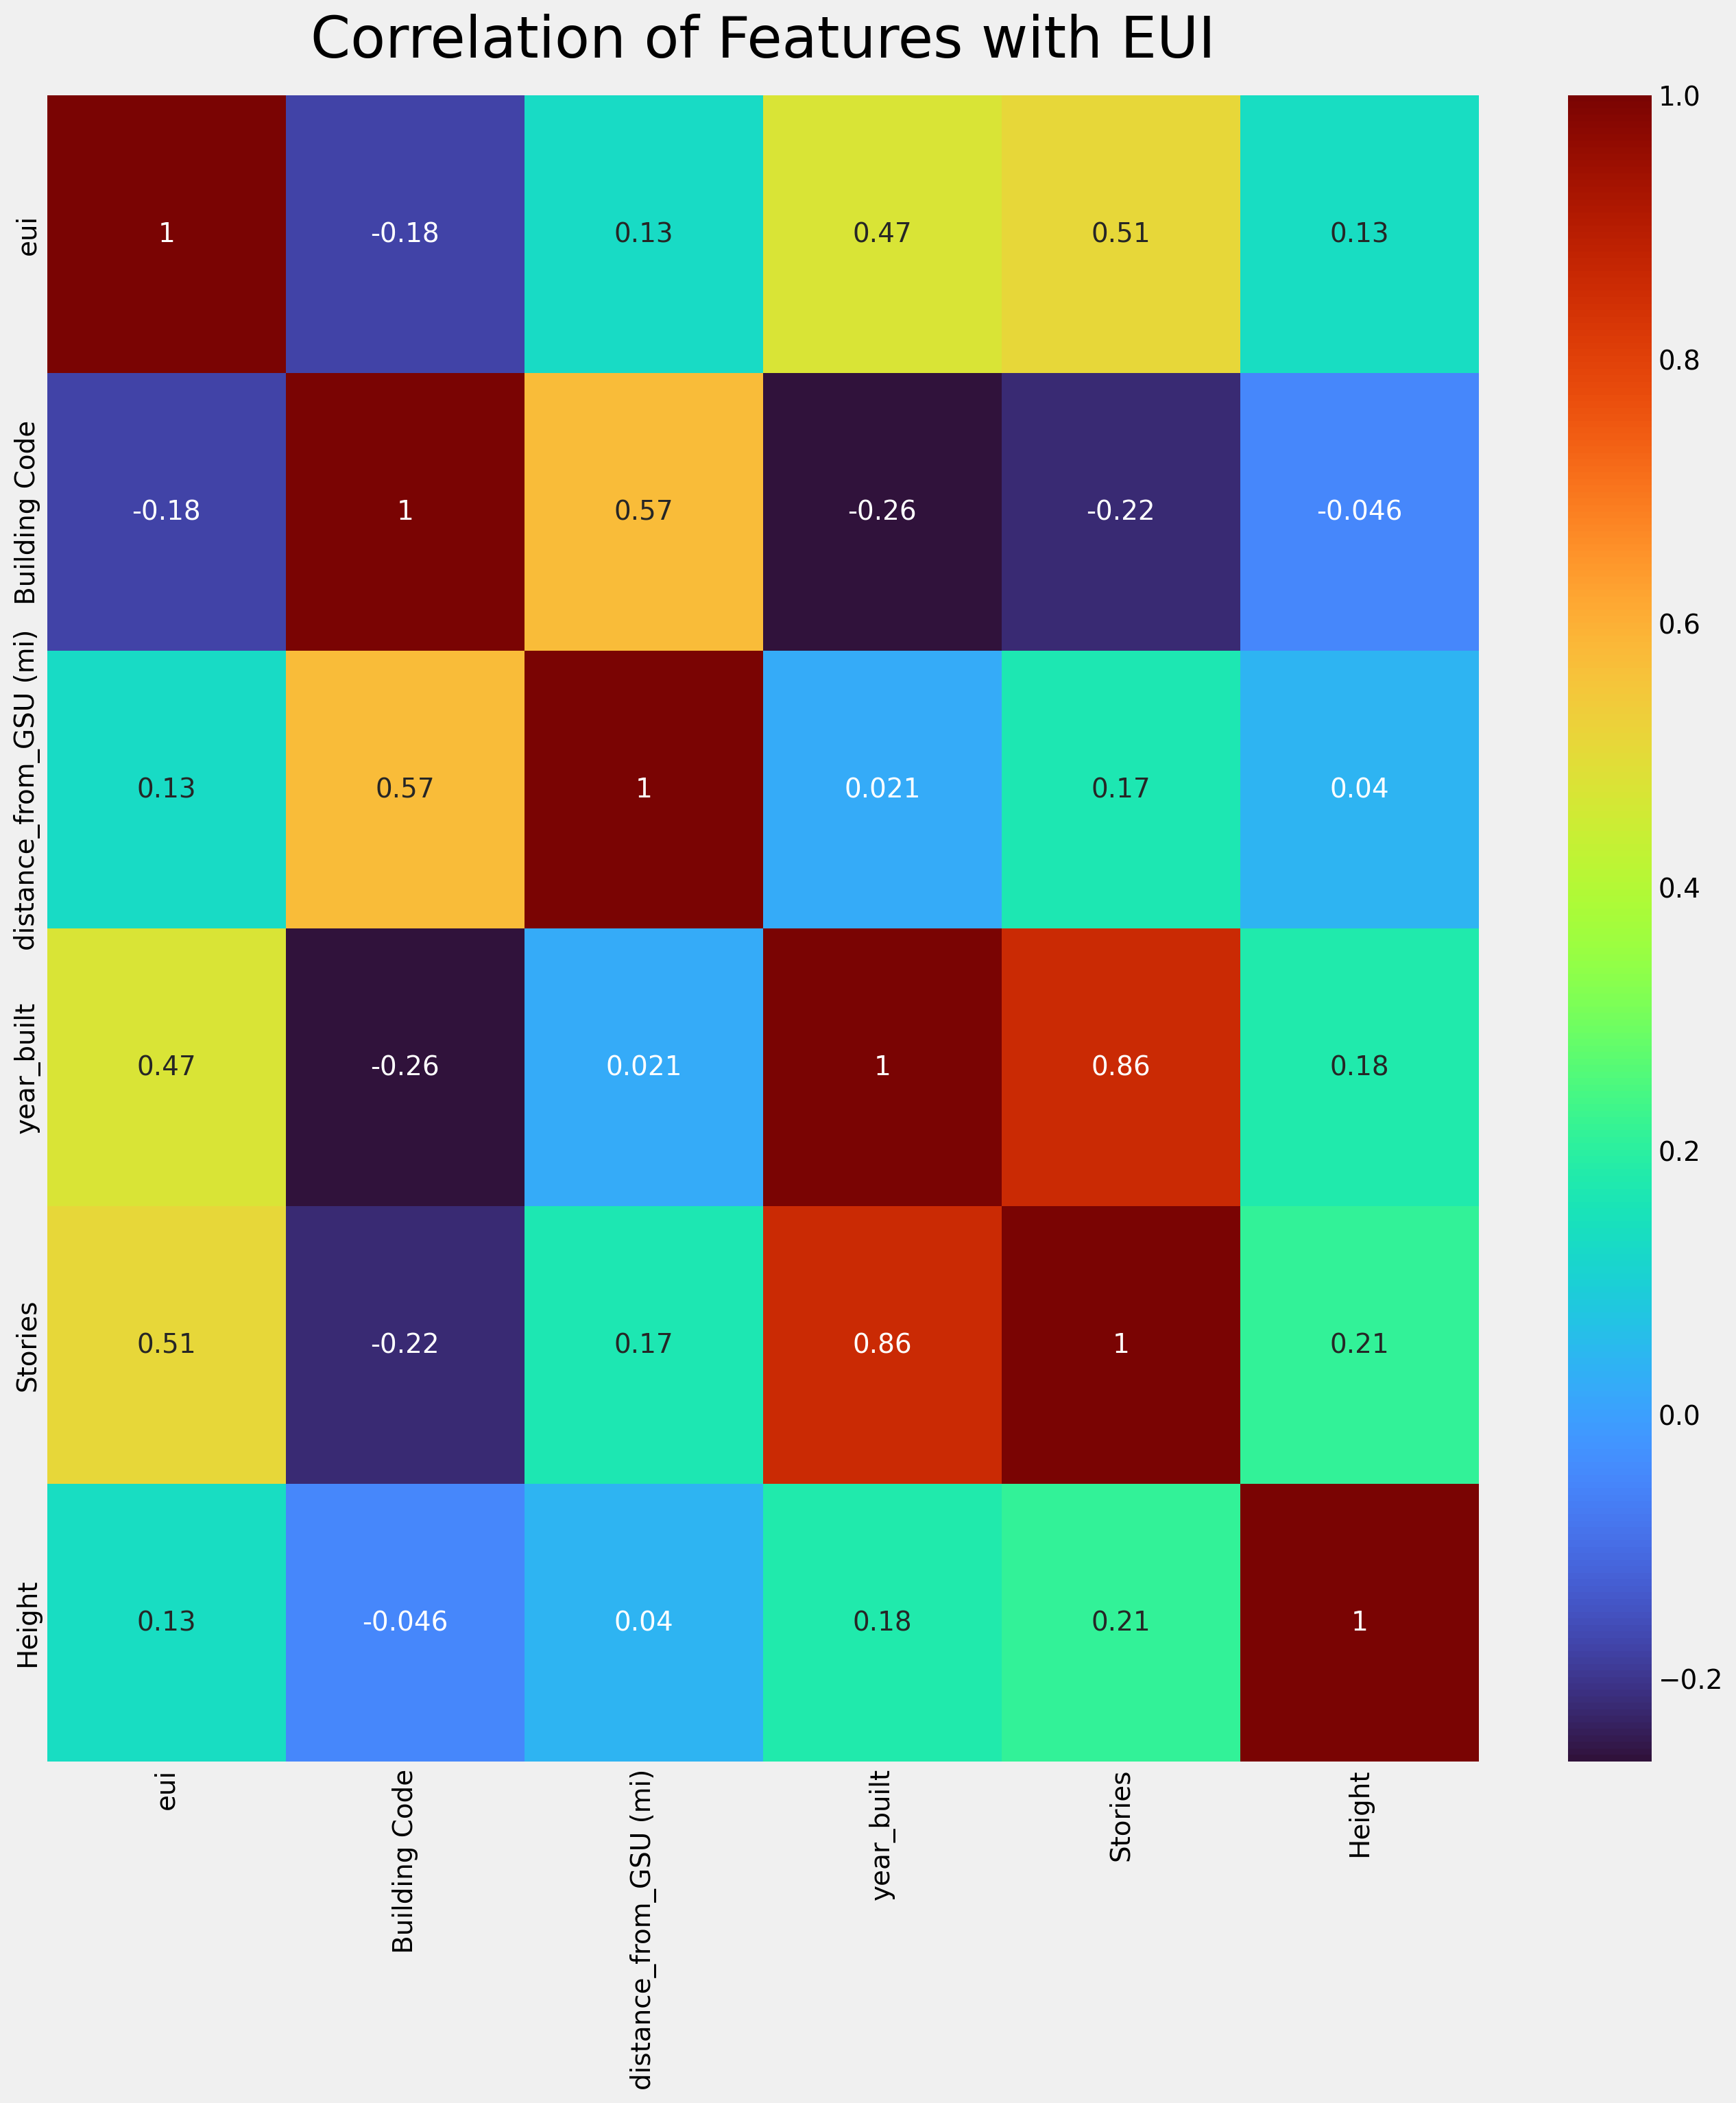

In [9]:
p_corr = df.corr(method='pearson')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sns.heatmap(p_corr, annot=True, cmap='turbo', ax=ax)
ax.set_title('Correlation of Features with EUI', fontsize=30, pad=20)

In [10]:
df.to_csv(DATA_PATH.joinpath('processed', 'df_train_full.csv'))